### Data Exploration - Audio Features

In this notebook, we will conduct a basic exploration on the audio features of the songs in the dataset. Additionally, we will also visualize number of recorded dates per country. 

* You can find a word cloud of the most listened songs (in terms of streams).
* You can find a world map showing the distribution of the data across countries.
* `plot_average_feature_daily(charts_df, features_df, country, year, feature)`: This function plots the average value of a given feature in the top-200 songs of that country for each day in a given year.
* `compare_average_feature_daily_countries(charts_df, features_df, country1, country2, year, feature)`: This function plots the average value of a given feature in the top-200 songs of two countries for each day in a given year.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import argparse
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib import font_manager
import matplotlib.dates as mdates


plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 150})
pd.options.mode.chained_assignment = None

In [3]:
# Change the font path and run this cell to use Roboto Condensed if it is not already configured on your system
FONT_PATH = "C:\\Users\\karab\\Desktop\\Data Literacy Repository\\env\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\RobotoCondensed"

font = font_manager.FontEntry(fname=FONT_PATH, name="Roboto Condensed")
font_manager.fontManager.ttflist.append(font)

In [4]:
# Adjust the following paths if necessary
CHARTS_PATH = "../data/charts_processed.csv"
FEATURE_PATH = "../data/audio_features_processed.csv"

In [5]:
charts_df = pd.read_csv(CHARTS_PATH)
features_df = pd.read_csv(FEATURE_PATH)

In [6]:
mod = charts_df[charts_df["region"] == "Global"]
mod

,title,rank,date,artist,url,region,chart,trend,streams
3234,Starboy,1,2017-01-01,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,Global,top200,SAME_POSITION,3135625.0
3235,Closer,2,2017-01-01,"The Chainsmokers, Halsey",https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,Global,top200,SAME_POSITION,3015525.0
3236,Let Me Love You,3,2017-01-01,"DJ Snake, Justin Bieber",https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,Global,top200,MOVE_UP,2545384.0
3237,Rockabye (feat. Sean Paul & Anne-Marie),4,2017-01-01,Clean Bandit,https://open.spotify.com/track/5knuzwU65gJK7IF...,Global,top200,MOVE_DOWN,2356604.0
3238,One Dance,5,2017-01-01,"Drake, WizKid, Kyla",https://open.spotify.com/track/1xznGGDReH1oQq0...,Global,top200,SAME_POSITION,2259887.0
...,...,...,...,...,...,...,...,...,...
26171027,Shake It,46,2021-07-31,INNDRIVE,https://open.spotify.com/track/5otdjL2CJnNLbY3...,Global,viral50,SAME_POSITION,NaN
26171028,Ain't Shit,47,2021-07-31,Doja Cat,https://open.spotify.com/track/5lAnYvAIkSDNXqf...,Global,viral50,SAME_POSITION,NaN
26171029,Ride the Lightning - 717 Tapes,48,2021-07-31,Warren Zeiders,https://open.spotify.com/track/1JTQG8J8jN8tjDT...,Global,viral50,MOVE_UP,NaN
26171030,Feels Like Summer,49,2021-07-31,Samuel Jack,https://open.spotify.com/track/0VJXYUuvJAg4NdZ...,Global,viral50,MOVE_DOWN,NaN


In [7]:
# get only the region = global columns, then group according to each unique song and sum their streams
mod = charts_df[charts_df["region"] == "Global"]
mod = mod.groupby("title").sum(['streams']).sort_values(by=['streams'], ascending=False)
mod

,rank,streams
title,,
Shape of You,148933,2.921494e+09
Blinding Lights,12969,2.623933e+09
Dance Monkey,43871,2.373958e+09
Someone You Loved,45952,2.111298e+09
Sunflower - Spider-Man: Into the Spider-Verse,68026,2.046023e+09
...,...,...
Lemon - Edit,199,0.000000e+00
Lejos De Tu Piel - Operación Triunfo 2017,140,0.000000e+00
Legends Never Die (feat. Against the Current),194,0.000000e+00


In [8]:
#create song - frequency dictionary
song_freq = {}
for index, row in mod.iterrows():
    song_freq[index] = row['streams']

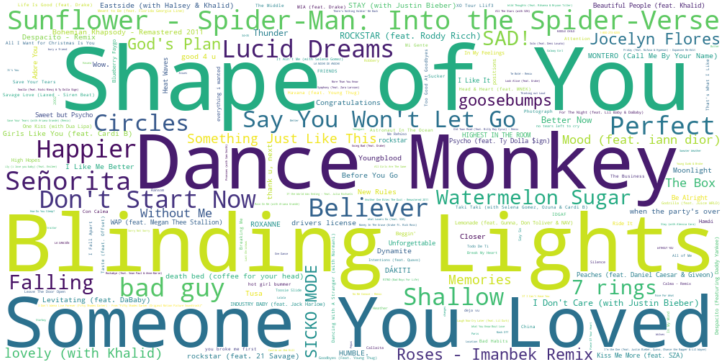

In [9]:
# create a word cloud of the top 100 songs
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib

wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate_from_frequencies(song_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [10]:
# get unique number of countries
countries = charts_df.region.unique()
len(countries)

70

In [11]:
def retrieve_yearly_data(df, year):
    """
    Retrieve the data for a given year
    """
    return df.loc[df['year'] == year]

def retrieve_monthly_data(df, year, month):
    """
    Retrieve the data for a given month of a given year
    """
    return df.loc[(df['year'] == year) & (df['month'] == month)]

def retrieve_daily_data(df, year, month, day):
    """
    Retrieve the data for a given day of a given month of a given year
    """
    return df.loc[(df['year'] == year) & (df['month'] == month) & (df['day'] == day)]

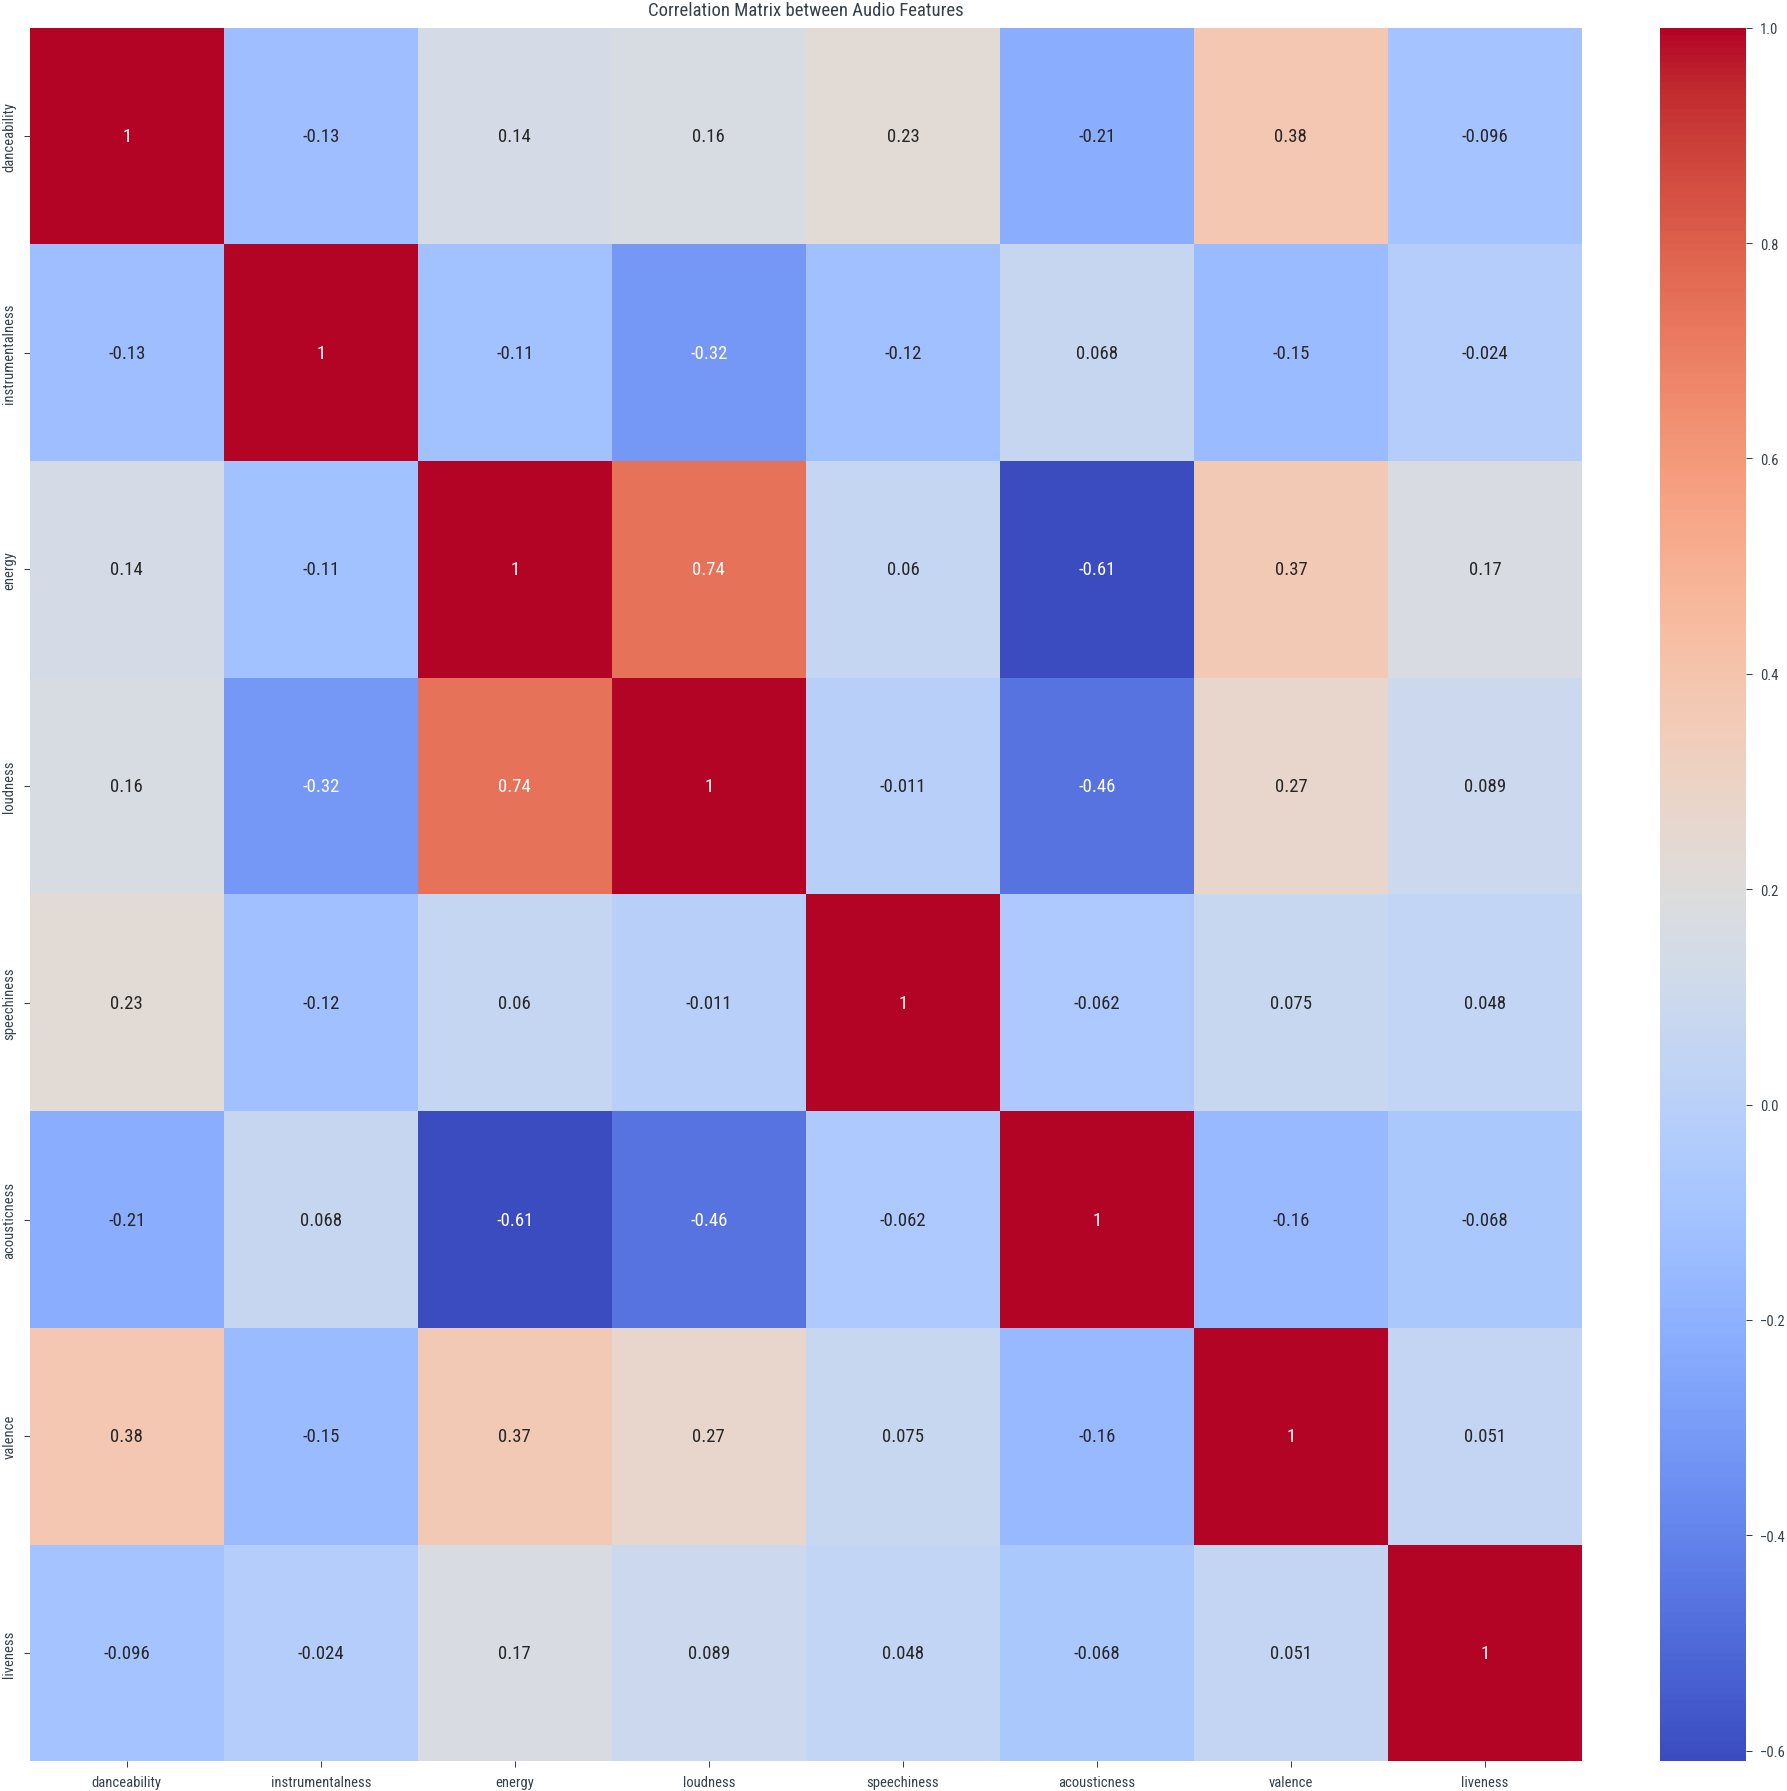

In [12]:
features = ['danceability', 'instrumentalness', 'energy', 'loudness', 'speechiness', 'acousticness', 'valence', 'liveness']

# plot correlation matrix
import seaborn as sns
plt.figure(figsize=(12, 12))
plt.title('Correlation Matrix between Audio Features')
sns.heatmap(features_df[features].corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
def plot_average_feature_daily(charts_df, features_df, country, year, feature):
    df_country = charts_df.loc[charts_df['region'] == country]
    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    df_country = df_country.loc[df_country['year'] == year]
    df_country['url'] = df_country['url'].str.split('/').str[-1]
    df_country = df_country.merge(features_df, left_on='url', right_on='id')

    # for each unique day, get the mean of the feature
    feature_daily_mean = df_country.groupby('date').apply(lambda x: x[feature].mean())
    # get standard deviation daily
    # feature_daily_std = df_country.groupby('date').apply(lambda x: x[feature].std())
    x = feature_daily_mean.index
    y = feature_daily_mean.values

    # plot the feature over time
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    # ms: width of the dots
    # lw: width of the line
    ax.plot(x, y, '.-', ms=2, lw=0.85, color=rgb.tue_darkgreen, label="average value of " + feature)
    # plt.fill_between(y, y+std, y-std, alpha=0.9, color=rgb.mps_gray, label="± standard deviation")
    ax.set_xlabel("days")
    ax.set_ylabel(feature)
    ax.legend(loc="upper right")

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylim([0.5, 0.8])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_red, linewidth=0.3)
    plt.title("Daily average energy of the top-200 in " + country + " in " + str(year))
    plt.show()


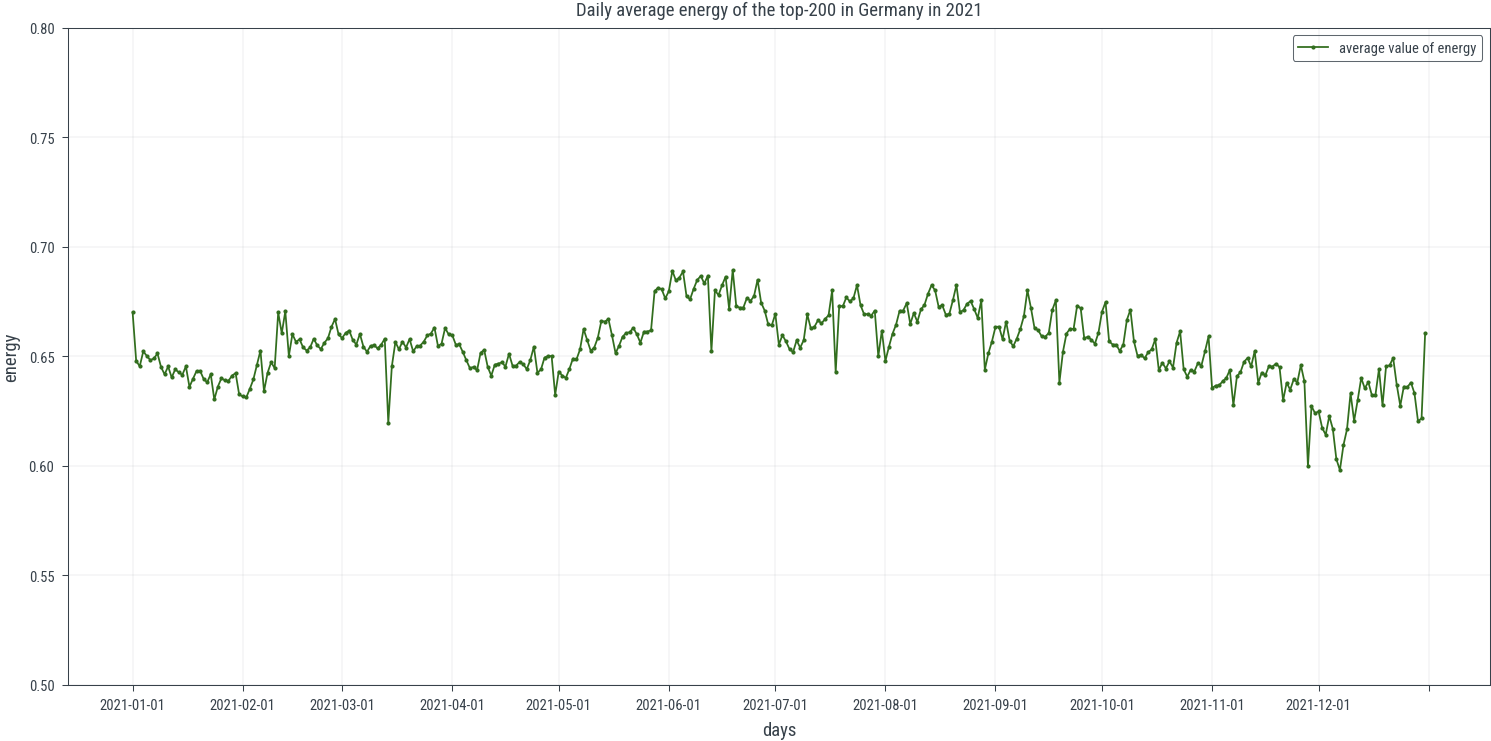

In [14]:
plot_average_feature_daily(charts_df, features_df, "Germany", 2021, "energy")

In [15]:
def compare_average_feature_daily_countries(charts_df, features_df, country1, country2, year, feature):
    def get_country_data(df, country):
        df_country = df.loc[df['region'] == country]
        df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
        df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
        df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
        df_country = df_country.loc[df_country['year'] == year]
        df_country['url'] = df_country['url'].str.split('/').str[-1]
        df_country = df_country.merge(features_df, left_on='url', right_on='id')
        return df_country
    
    df_country1 = get_country_data(charts_df, country1)
    df_country2 = get_country_data(charts_df, country2)

    # for each unique day, get the mean of the feature
    feature_daily_mean_country1 = df_country1.groupby('date').apply(lambda x: x[feature].mean())
    feature_daily_mean_country2 = df_country2.groupby('date').apply(lambda x: x[feature].mean())

    # do the same thing as above but with two countries
    x = feature_daily_mean_country1.index
    y1 = feature_daily_mean_country1.values
    y2 = feature_daily_mean_country2.values
    
    # plot the feature over time
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    # ms: width of the dots
    # lw: width of the line
    ax.plot(x, y1, '.-', ms=2, lw=0.85, color=rgb.tue_darkgreen, label="average value of " + feature + " in " + country1)
    ax.plot(x, y2, '.-', ms=2, lw=0.85, color=rgb.tue_red, label="average value of " + feature + " in " + country2)
    # plt.fill_between(y, y+std, y-std, alpha=0.9, color=rgb.mps_gray, label="± standard deviation")
    ax.set_xlabel("days")
    ax.set_ylabel(feature)
    ax.legend(loc="upper right")

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylim([0.5, 0.8])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_red, linewidth=0.3)
    plt.title("Daily average energy of the top-200 in " + country1 + " and " + country2 + " in " + str(year))
    plt.show()


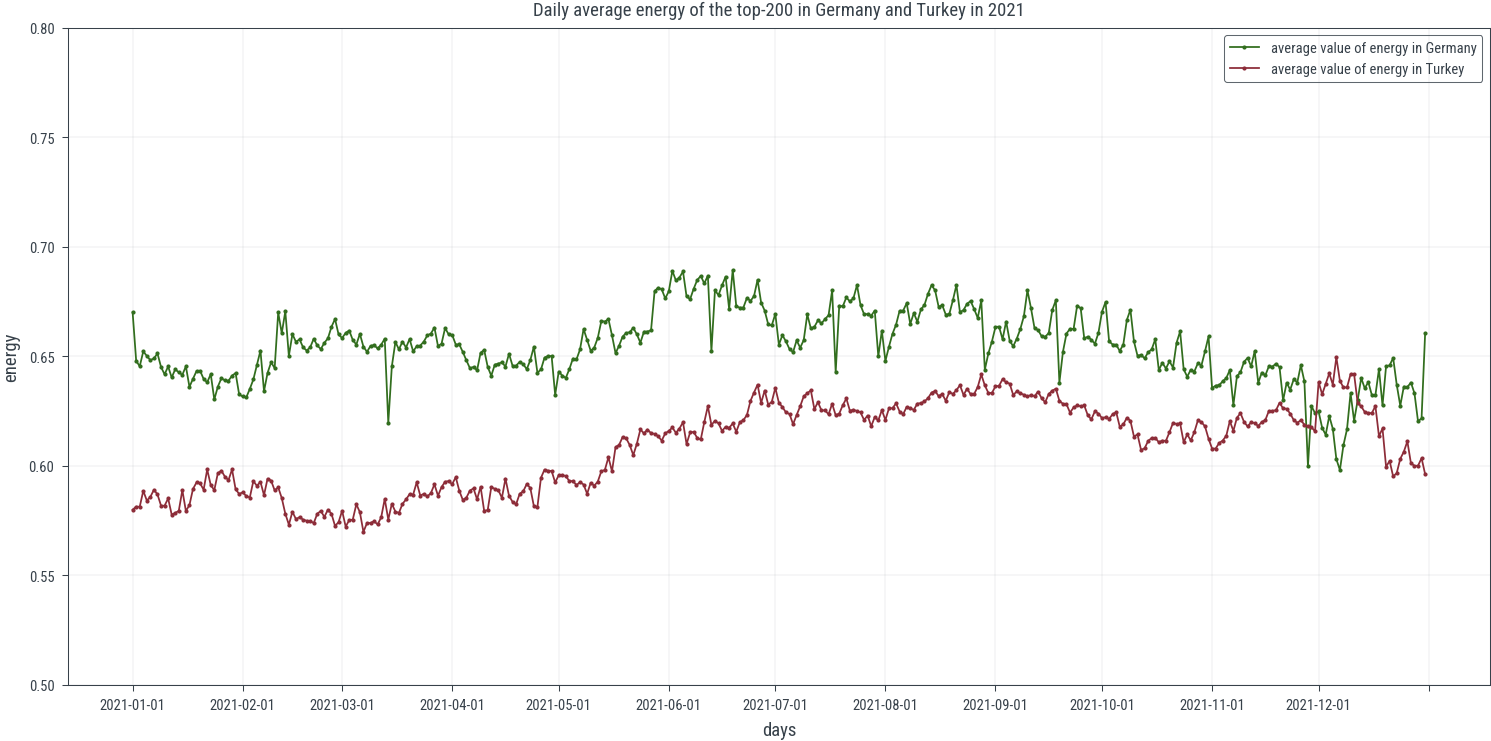

In [16]:
compare_average_feature_daily_countries(charts_df, features_df, "Germany", "Turkey", 2021, "energy")

In [17]:
def compare_average_feature_daily_countries(charts_df, features_df, country1, country2, feature):
    def get_country_data(df, country):
        df_country = df.loc[df['region'] == country]
        df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
        df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
        df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
        df_country['url'] = df_country['url'].str.split('/').str[-1]
        df_country = df_country.merge(features_df, left_on='url', right_on='id')
        return df_country
    
    df_country1 = get_country_data(charts_df, country1)
    df_country2 = get_country_data(charts_df, country2)

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)


    country1_data = []
    country2_data = []
    for y in range(2017, 2022):
        # for 2020 drop 28th of February
        df_country1_year = df_country1.loc[df_country1['year'] == y]
        df_country2_year = df_country2.loc[df_country2['year'] == y]
        if y == 2020:
            # drop month = 2 day = 28
            df_country1_year = df_country1_year.loc[(df_country1_year['month'] != 2) | (df_country1_year['day'] != 28)]
            df_country2_year = df_country2_year.loc[(df_country2_year['month'] != 2) | (df_country2_year['day'] != 28)]

        # for each unique day, get the mean of the feature
        feature_daily_mean_country1 = df_country1_year.groupby('date').apply(lambda x: x[feature].mean())
        feature_daily_mean_country2 = df_country2_year.groupby('date').apply(lambda x: x[feature].mean())

        # do the same thing as above but with two countries
        x = feature_daily_mean_country1.index
        y1 = feature_daily_mean_country1.values
        y2 = feature_daily_mean_country2.values
        # replace year with 2021:
        x = [str(y) + "-" + str(x)[5:] for x in x]

        # ms: width of the dots
        # lw: width of the line
        country1_data.append((x, y1))
        country2_data.append((x, y2))
        # plt.fill_between(y, y+std, y-std, alpha=0.9, color=rgb.mps_gray, label="± standard deviation")
    
    x = country1_data[0][0]
    for i in range(len(country1_data)):
        year = i + 2017
        ax.plot(x, country1_data[i][1], '.-', ms=2, lw=0.85, color=rgb.tue_darkgreen, alpha =(year - 2017) / (2022 - 2017),label=country1 + " in " + str(year))
    for i in range(len(country2_data)):
        year = i + 2017
        ax.plot(x, country2_data[i][1], '.-', ms=2, lw=0.85, color=rgb.tue_red, alpha =(year - 2017) / (2022 - 2017), label= country2 + " in " + str(year))
    
    ax.set_xlabel("days")
    ax.set_ylabel(feature)
    ax.legend(loc="upper right")
    
    # get rid of years from dates
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
  
    ax.grid(True)
    ax.set_ylim([0.5, 0.8])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_red, linewidth=0.3)
    plt.title("Daily average " + feature + " of the top-200 in " + country1 + " and " + country2)
    plt.show()
    

In [18]:
# get unique countries
countries = charts_df['region'].unique()
countries

array(['Argentina', 'Australia', 'Brazil', 'Austria', 'Belgium',
       'Colombia', 'Bolivia', 'Denmark', 'Bulgaria', 'Canada', 'Chile',
       'Costa Rica', 'Czech Republic', 'Finland', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Estonia', 'France', 'Germany', 'Global',
       'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Lithuania', 'Malaysia', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Singapore', 'Spain',
       'Slovakia', 'Sweden', 'Taiwan', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Uruguay', 'Thailand',
       'Andorra', 'Romania', 'Vietnam', 'Egypt', 'India', 'Israel',
       'Morocco', 'Saudi Arabia', 'South Africa', 'United Arab Emirates',
       'Russia', 'Ukraine', 'South Korea'], dtype=object)

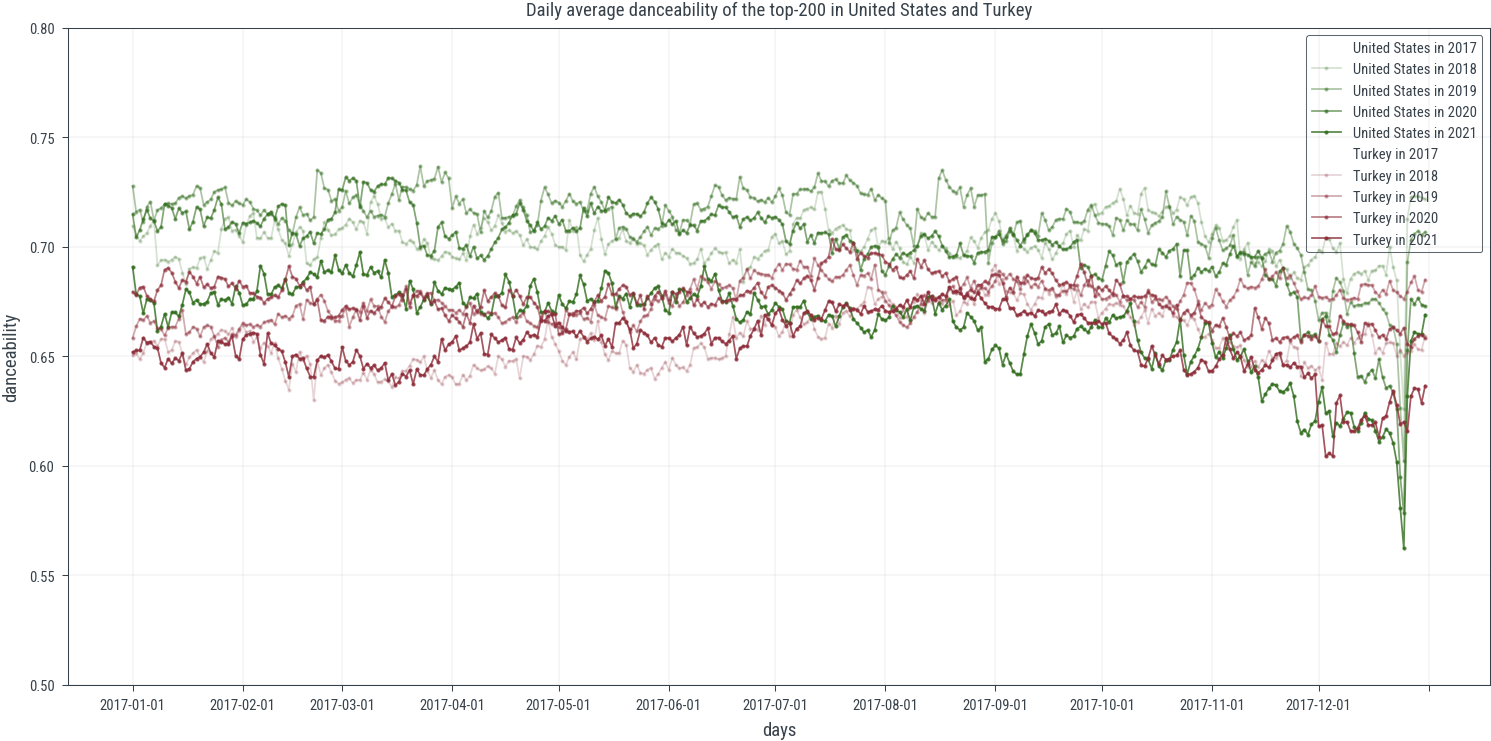

In [19]:
compare_average_feature_daily_countries(charts_df, features_df, "United States", "Turkey", "danceability")

In [20]:
# get regions in charts_df
regions = charts_df['region'].unique()
regions

array(['Argentina', 'Australia', 'Brazil', 'Austria', 'Belgium',
       'Colombia', 'Bolivia', 'Denmark', 'Bulgaria', 'Canada', 'Chile',
       'Costa Rica', 'Czech Republic', 'Finland', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Estonia', 'France', 'Germany', 'Global',
       'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Lithuania', 'Malaysia', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Singapore', 'Spain',
       'Slovakia', 'Sweden', 'Taiwan', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Uruguay', 'Thailand',
       'Andorra', 'Romania', 'Vietnam', 'Egypt', 'India', 'Israel',
       'Morocco', 'Saudi Arabia', 'South Africa', 'United Arab Emirates',
       'Russia', 'Ukraine', 'South Korea'], dtype=object)

In [21]:
# replace following country names:
# South Korea --> Korea
charts_df['region'] = charts_df['region'].replace('South Korea', 'Korea')

In [22]:
# count number of unique countries
len(charts_df['region'].unique())

70

In [23]:
# get number of rows for each country and create a new dataframe
country_counts = charts_df['region'].value_counts()
country_counts = pd.DataFrame(country_counts)

# make index a column as well
country_counts.reset_index(inplace=True)


import pycountry
# get iso codes and add them to the dataframe
iso_codes = []
for country in country_counts['region']:
    try:
        iso_codes.append(pycountry.countries.search_fuzzy(country)[0].alpha_3)
    except:
        iso_codes.append('None')
country_counts['iso_code'] = iso_codes
country_counts

SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='GT-GU', country_code='GT', name='Guatemala', parent_code=None, type='Department')
SubdivisionHierarchy(code='PA-8', country_code='PA', name='Panamá', parent_code=None, type='Province')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')


,region,count,iso_code
0,Argentina,455308,ARG
1,United States,455057,USA
2,Austria,454592,AUT
3,Brazil,454438,BRA
4,Australia,453103,AUS
...,...,...,...
65,Ukraine,127544,UKR
66,Russia,126837,RUS
67,Luxembourg,98053,LUX
68,Andorra,79592,AND


In [24]:
# update turkey iso code to 'TUR'
country_counts.loc[country_counts['region'] == 'Turkey', 'iso_code'] = 'TUR'

In [104]:
import plotly.express as px

# Create basic choropleth map
fig = px.choropleth(country_counts, 
                    locations='iso_code', 
                    color='count', 
                    hover_name='region',
                    projection='natural earth', 
                    title='Number of recorded dates per country',
                    color_continuous_scale='teal')
fig.show()